# Câu Hỏi, Đáp Án và Phân Tích
The Movies Dataset

---

## 0. Môi trường và Dữ Liệu


Tất cả các thư viện môi trường dùng trong đồ án này được liệt kê trong file `environment.yml`.

Trước khi tiến hành phân tích dữ liệu, chúng ta sẽ import các thư viện sau.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
import wordcloud

Với dữ liệu sau khi khám phá và xử lý sơ bộ, chúng ta sẽ sử dụng chúng để phân tích và trả lời câu hỏi. Ta vẫn lưu chúng vào DataFrame là `movies`.

In [36]:
movies = pd.read_csv('Data/movies_cleaned.csv')
movies.head(5)

,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation,Comedy,Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30 00:00:00,373554033,81.0,English,Released,UNKNOWN,Toy Story,False,7.7,5415
1,False,UNKNOWN,65000000,"Adventure,Fantasy,Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15 00:00:00,262797249,104.0,"English,Français",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,Grumpy Old Men Collection,0,"Romance,Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros.,Lancaster Gate",United States of America,1995-12-22 00:00:00,0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,UNKNOWN,16000000,"Comedy,Drama,Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22 00:00:00,81452156,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,Father of the Bride Collection,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions,Touchstone Pictures",United States of America,1995-02-10 00:00:00,76578911,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


## 1. Đặt câu hỏi
- Câu hỏi 1: Thể loại phim ảnh hưởng đến doanh thu và mức độ phổ biến như thế nào theo thời gian?
- Câu hỏi 2: Những yếu tố nào ảnh hưởng đến mức độ phổ biến của phim, và chúng tương tác như thế nào?

## 2. Phân tích và trả lời

#### **Câu hỏi 1: Mức đánh giá trung bình của phim có thay đổi theo thời gian như thế nào và yếu tố nào đóng góp vào sự thay đổi đó?** 

Để phân tích câu hỏi trên, chúng ta sẽ tập trung vào hai khía cạnh chính nhằm hiểu rõ hơn về xu hướng thay đổi trong mức đánh giá trung bình của các bộ phim.

1. **Phân tích sự thay đổi theo thời gian của mức đánh giá trung bình:**  
    Trước tiên, chúng ta sẽ trả lời câu hỏi: **"Mức đánh giá trung bình của phim đã thay đổi như thế nào theo từng năm?".**  

    Kết quả phân tích sẽ giúp ta nắm rõ hơn những ý sau: 
    - Cung cấp cái nhìn tổng quan về xu hướng đánh giá của khán giả theo thời gian.
    - Hỗ trợ các nhà sản xuất trong việc xác định giai đoạn có chất lượng phim được đánh giá cao nhất.
    - Giúp hiểu rõ sự thay đổi trong sở thích và kỳ vọng của người xem.

2. **Phân tích các yếu tố ảnh hưởng đến sự thay đổi:**  
    Tiếp theo, chúng ta sẽ đi sâu vào phân tích các yếu tố có thể tác động đến sự thay đổi mức đánh giá trung bình, thông qua câu hỏi: **"Yếu tố nào, chẳng hạn như thể loại phim, đạo diễn, ngân sách, hay thời lượng, đóng vai trò quan trọng nhất trong việc ảnh hưởng đến sự thay đổi này?".**  
    
    Kết quả mong đợi:
    - Xác định những yếu tố có ảnh hưởng mạnh mẽ đến đánh giá trung bình qua các năm.
    - Hỗ trợ các nhà làm phim tối ưu hóa các yếu tố này để tăng cường chất lượng và mức độ yêu thích từ khán giả.
Hai khía cạnh trên không chỉ giúp hiểu rõ xu hướng thay đổi mà còn cung cấp thông tin hữu ích để cải thiện chiến lược sản xuất và quảng bá phim trong tương lai.

**1.1** Đầu tiên chúng ta sẽ trả lời câu hỏi **"Mức đánh giá trung bình của phim đã thay đổi như thế nào theo từng năm?"**

In [37]:
#Tạo cột mới cho năm phát hành 
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year
movies['release_year']


0        1995.0
1        1995.0
2        1995.0
3        1995.0
4        1995.0
          ...  
45184       NaN
45185    2011.0
45186    2003.0
45187    1917.0
45188    2017.0
Name: release_year, Length: 45189, dtype: float64

In [38]:
#Tính mức đánh giá trung bình theo năm để phân tích xu hướng đánh giá theo thời gian
avg_ratings_per_year = movies.groupby('release_year')['vote_average'].mean().reset_index()
avg_ratings_per_year

,release_year,vote_average
0,1874.0,6.000000
1,1878.0,6.200000
2,1883.0,5.400000
3,1887.0,4.100000
4,1888.0,5.150000
...,...,...
130,2015.0,5.781210
131,2016.0,5.842696
132,2017.0,5.866857
133,2018.0,0.000000


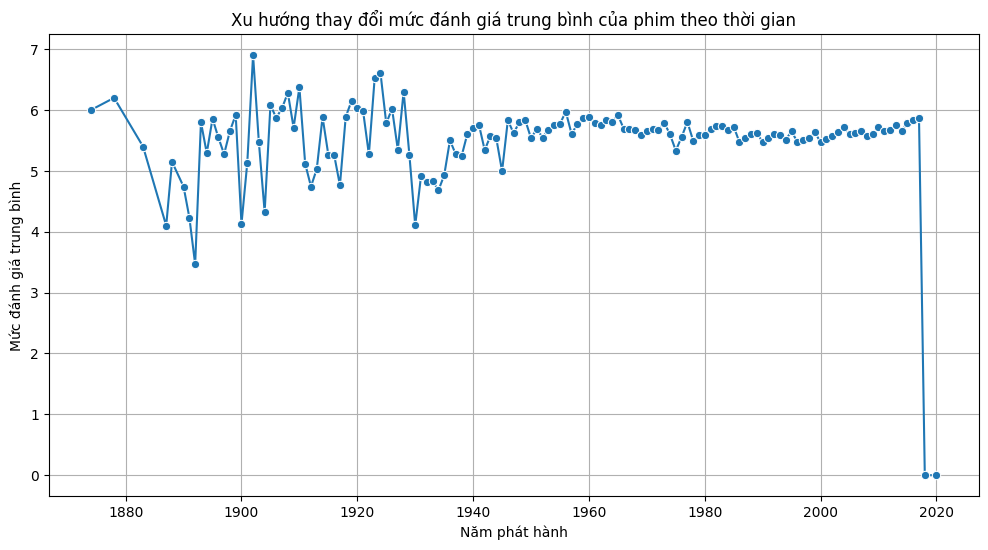

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_ratings_per_year, x='release_year', y='vote_average', marker='o')
plt.title('Xu hướng thay đổi mức đánh giá trung bình của phim theo thời gian')
plt.xlabel('Năm phát hành')
plt.ylabel('Mức đánh giá trung bình')
plt.grid(True)
plt.show()

Từ biểu đồ trên ta có thể rút ra một số kết luận sau:
1. **Giai đoạn đầu (1874 - 1900)**:
    - Trong giai đoạn này, số lượng phim sản xuất còn rất ít, do đó mức đánh giá trung bình có sự dao động lớn. 
    - Mức đánh giá trung bình dao động từ 4.1 đến 6.2.

2. **Giai đoạn 1900 - 1950**:
    - Mức đánh giá trung bình có xu hướng tăng dần, cho thấy sự cải thiện về chất lượng phim qua thời gian.
    - Tuy nhiên, vẫn có một số năm mức đánh giá giảm mạnh, có thể do sự xuất hiện của một số phim có chất lượng thấp.

3. **Giai đoạn 1950 - 2000**:
    - Mức đánh giá trung bình ổn định hơn, dao động quanh mức 5.5 đến 6.5.
    - Đây là giai đoạn mà ngành công nghiệp điện ảnh phát triển mạnh mẽ, với nhiều bộ phim kinh điển ra đời.

4. **Giai đoạn 2000 - 2020**:
    - Mức đánh giá trung bình có xu hướng giảm nhẹ, dao động quanh mức 5.5 đến 6.0.
    - Sự giảm nhẹ này có thể do sự gia tăng về số lượng phim sản xuất, dẫn đến sự xuất hiện của nhiều phim có chất lượng trung bình hoặc thấp.

5. **Năm 2018 và 2020**:
    - Mức đánh giá trung bình bằng 0, có thể do thiếu dữ liệu hoặc không có phim nào được đánh giá trong các năm này.

Nhìn chung, mức đánh giá trung bình của phim có xu hướng ổn định và dao động quanh mức 5.5 đến 6.5 trong suốt hơn một thế kỷ qua. Sự dao động lớn trong những năm đầu có thể do số lượng phim ít và chất lượng không đồng đều. Trong khi đó, sự ổn định trong những năm gần đây cho thấy sự phát triển và chuyên nghiệp hóa của ngành công nghiệp điện ảnh.
```

**1.2** Phân tích các yếu tố ảnh hưởng đến sự thay đổi mức đánh giá

**Mục tiêu:** Phân tích các yếu tố có thể ảnh hưởng đến sự thay đổi của mức đánh giá trung bình của phim, từ đó hiểu rõ hơn về sự biến động trong thị hiếu khán giả.  

- Bước 1: Ta sẽ chọn ra biến số để phân tích sâu hơn đó là `genres`.  
    **Mục tiêu**: Đánh giá mức độ ảnh hưởng của từng thể loại phim đến mức đánh giá trung bình.  
    **Cách thực hiện**:
    - Mở rộng `genres` để mỗi thể loại chiếm một dòng riêng.
    - Tính mức đánh giá trung bình cho từng thể loại.
    - Trực quan hóa mức đánh giá trung bình theo thể loại bằng biểu đồ cột.

- Bước 2: Trực quan hóa các thể loại phổ biến bằng WordCloud
    **Mục tiêu**: Minh họa sự phổ biến của các thể loại phim dưới dạng WordCloud.
    **Cách thực hiện**:
    - Kết hợp tất cả các thể loại phim thành một chuỗi văn bản.
    - Tạo WordCloud để trực quan hóa mức độ phổ biến của các thể loại.

In [40]:
# Mở rộng các thể loại phim thành nhiều dòng nếu chúng được lưu dưới dạng danh sách
genres_exploded = movies['genres'].str.split(',').explode('genres')
genres_exploded

0        Animation
1           Comedy
2           Family
3        Adventure
4          Fantasy
           ...    
93158       Action
93159        Drama
93160     Thriller
93161      UNKNOWN
93162      UNKNOWN
Name: genres, Length: 93163, dtype: object

In [41]:
# Kết hợp genres_exploded với dataframe gốc movies để bao gồm cột vote_average
genres_exploded_df = movies[['genres', 'vote_average']].copy()
genres_exploded_df['genres'] = genres_exploded_df['genres'].str.split(',').explode('genres')

# Tính mức đánh giá trung bình theo thể loại
genre_avg_ratings = genres_exploded_df.groupby('genres')['vote_average'].mean().reset_index()
genre_avg_ratings

,genres,vote_average
0,Action,5.639733
1,Adventure,5.712323
2,Animation,5.570098
3,Comedy,5.653377
4,Crime,5.637079
5,Documentary,5.552839
6,Drama,5.611926
7,Family,5.763360
8,Fantasy,5.697434
9,Foreign,5.570296


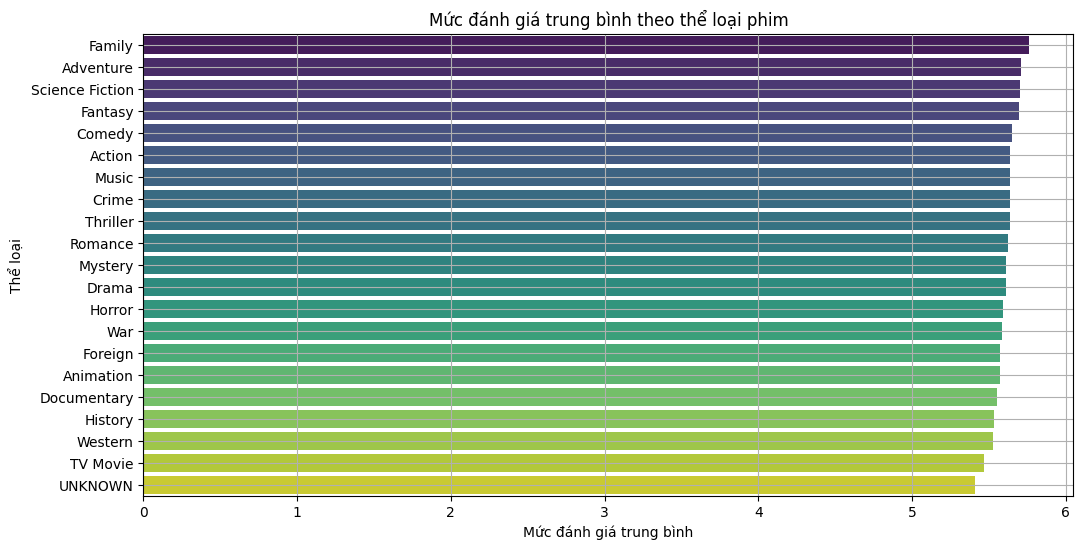

In [42]:
# Vẽ biểu đồ mức đánh giá trung bình theo thể loại
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_avg_ratings.sort_values('vote_average', ascending=False), x='vote_average', y='genres', hue='genres', palette='viridis', legend=False)
plt.title('Mức đánh giá trung bình theo thể loại phim')
plt.xlabel('Mức đánh giá trung bình')
plt.ylabel('Thể loại')
plt.grid(True)
plt.show()

Như vậy từ các quan sát từ các biểu đồ trên, chúng ta có thể rút ra một số nhận xét sau:

**Thể loại nổi bật với đánh giá cao:**
- Các thể loại như **Family**, **Adventure**, và **Science Fiction** có mức đánh giá trung bình cao, cho thấy sự yêu thích từ phía khán giả đối với những dòng phim mang tính giải trí, phiêu lưu và sáng tạo.

**Thể loại phổ biến nhưng có đánh giá thấp:**
- Thể loại **TV Movie** và **UNKNOWN** có mức đánh giá trung bình thấp nhất, có thể phản ánh rằng các thể loại này ít được đầu tư về chất lượng nội dung hoặc không đáp ứng được kỳ vọng của khán giả.

**Sự chênh lệch mức đánh giá:**
- Biểu đồ cho thấy mức độ đánh giá trung bình không quá khác biệt giữa các thể loại, nhưng vẫn đủ để nhận diện những thể loại được yêu thích hơn hoặc ít được ưa chuộng hơn.

**Phân tích theo thị hiếu khán giả:**
- Những thể loại có đánh giá cao thường là những thể loại mang tính giải trí và dễ tiếp cận với đa dạng đối tượng khán giả. Các thể loại ít phổ biến hoặc thuộc nhóm chuyên biệt hơn thường có mức đánh giá thấp.

---

**Thông tin hữu ích cho các đối tượng:**

**Nhà sản xuất:**
- Nên tập trung đầu tư vào các thể loại phim phổ biến như **Family**, **Adventure**, và **Science Fiction** để đáp ứng nhu cầu thị trường.
- Có thể xem xét đầu tư vào các thể loại như **Comedy** hoặc **Drama**, vì các thể loại này cũng có tiềm năng mang lại sự yêu thích từ khán giả nếu nội dung được làm tốt.
- Các thể loại ít phổ biến như **TV Movie** hoặc **UNKNOWN** có thể không phải là ưu tiên hàng đầu nếu mục tiêu là tối ưu hóa lợi nhuận.

**Người xem:**
- Có thể dễ dàng tìm thấy các bộ phim thuộc thể loại **Family**, **Adventure**, và **Science Fiction** với chất lượng nội dung cao hơn.
- Nếu yêu thích các thể loại ít phổ biến hơn như **TV Movie**, người xem nên lưu ý rằng mức đánh giá trung bình của thể loại này thấp, và việc lựa chọn phim phù hợp có thể gặp khó khăn hơn.
